In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install preliz
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-ws8pkoq4
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-ws8pkoq4
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=13afa8b3ae19ee071e7185b1f06e342c60e4e7dfa920a2ee6d57151c6a31d18b
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2y98col/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
   ━

In [ ]:
import preliz as pz
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
az.style.use("arviz-darkgrid")

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

When using a polnomial, you can have a more variable shape that ends up better fitting your data. I'm going to try to explain what I understand here, but it's all very visual so bear with me: So basically when you use any of the methods we have used so far (linear, bionomial, etc) They can only capture a very general shape of the data (one hump, a genral line, etc.). However, when you use a polynomial, you can capture more bumps in the data with unique, variable lines. For example, if your data rose than fell 3 times, depending on the degree of your polnomial,you can capture that shape in your mean line.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Polonomialas fit really well, to thhe point where they sometimes overfit. If the reationnships within the data are not compliated enough, they won't work as well either.

**Task3**:

What's the point of using b splines?

They help mitigate over fitting when using polynomials and also can make an even more complex model of multiple polonomials together if that kind of shape is needed.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian process converts all the data points into knots (usually in the priors) and then the model uses them to make connections, which are usually good becuase then it can better understand (?) the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [ ]:
#im making a polynomial model

model = bmb.Model("weight ~ poly(height, degree=3)", data, family="negativebinomial")
idata = model.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


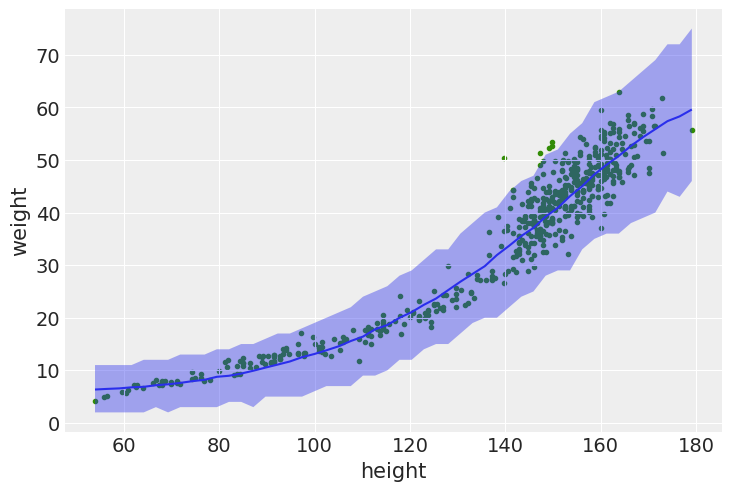

In [ ]:
#plot of posterior predictive dist
bmb.interpret.plot_predictions(model, idata, "height", pps=True)
#raw data
plt.plot(data.height, data.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

In the article, they make their gaussian process into an object then call it individually to call its different functions.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

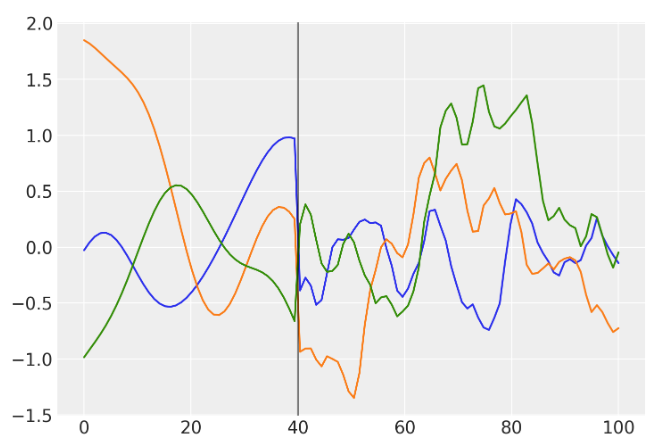

The number one reason i like this graph is because if looks cool. But that goes for most of these so let, me go more in depth. I think the concept of a defined change point is really interesting. I think that otherr than like priors maybe, there's onnly a few added commpoennts that can realy change a graph so significantly. I also like the fact that this is even possible to do and ho useful and perfectly it fit into this context.